In [73]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

#### Задача 1
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1.1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

парная регрессия $$b_1 = \frac{\sigma_{XY}}{\sigma^2_X}, \:\:
b_0 = \overline{Y} - b_1 \cdot {\overline{X}}$$
Здесь $X$, $Y$ — выборки, $\overline{X}$, $\overline{Y}$ — выборочное среднее, $\sigma^2_X$ — выборочная дисперсия, $\sigma_{XY}$ — выборочная ковариация.


In [3]:
b1 = np.cov(salary, scoring, ddof=1)[0,1] / np.var(salary, ddof=1)
b1

2.620538882402765

In [4]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

$$𝑦=444.177+2.62∗𝑥$$

In [5]:
salary_1 = np.column_stack((np.ones((salary.shape[0], 1)), salary))
salary_1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [6]:
XTX = salary_1.T.dot(salary_1)
#XTX
np.linalg.det(XTX)

349464.00000000023

In [7]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(salary_1.T).dot(scoring)

In [8]:
b

array([444.17735732,   2.62053888])

$$𝑦=444.177+2.62∗𝑥$$

2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

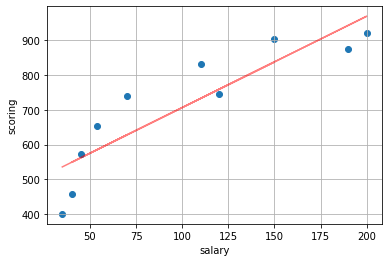

In [9]:
ox = salary
oy = b[0] + b[1] * ox
plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)
plt.xlabel('salary')
plt.ylabel('scoring')
plt.grid()

3. Почитайте коэффициент детерминации, среднюю ошибку аппроксимации.

В нашем решении мы уже делали предсказание при построении графика, поэтому в формуле используем его считаем по формуле 
$$R^2 = 1 - \dfrac{\sigma^2_{res}}{\sigma^2_{y}}$$


In [20]:
R1 = 1 - (oy - scoring).var() / scoring.var()
R1

0.7876386635293685

In [22]:
(np.corrcoef(salary, scoring) ** 2)[0,1]

0.7876386635293682

In [27]:
# аналогично делаем предсказание по методу наименьших квадратов
z2 = salary_1.dot(b)
R1 = 1 - (z2 - scoring).var() / scoring.var()
R1

0.7876386635293685

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера
$$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)},$$

In [36]:
n = salary.shape[0]
k1 = 1
k2 = n - k - 1

In [37]:
F1 = (R1 / k1) / ((1 - R1) / (k2))
F1

29.67164085966449

In [43]:
# в качестве уровня значимости будем использовать 0.05, поскольку условием не 
# задано обратное, а параметр требуется
alpha = 0.05
F2 = stats.f.ppf(1 - alpha, k1, k2)
F2

5.317655071578714

In [46]:
print(f'F1 > F2 {F1 > F2}, следовательно уравнение регресси статистически значимо')

F1 > F2 True, следовательно уравнение регресси статистически значимо


5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.
В нашем случае мы имеет парную регрессию. Для начала пользуемся формулой __стандартной ошибки коэффициента наклона__. Она вычисляется по формуле:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$

In [68]:
top = ((scoring - oy)**2).sum() / (n - 2)
bottom = ((salary - salary.mean())**2).mean()
s_slope = np.sqrt(top / bottom)
s_slope

1.5213173774865307

In [69]:
t = stats.t.ppf(1 - alpha / 2, df = n - 2)
t

2.3060041350333704

In [70]:
# интервал для b1
(b[1] - t * s_slope, b[1] + t * s_slope)

(-0.8876252807792944, 6.128703045584832)

In [71]:
s_intercept = s_slope * np.sqrt((salary**2).mean())
s_intercept

178.56274375247276

In [72]:
# интервал для b0
(b[0] - t * s_intercept, b[0] + t * s_intercept)

(32.41093186825282, 855.9437827804654)

#### 2. Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [246]:
# создадим новый категориальный признак city
city = ['Spb'] * 5 + ['Msc'] * 5
salary_new = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring_new = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [258]:
df = pd.DataFrame({'city': city, 'salary': salary_new, 'scoring': scoring_new})
df

,city,salary,scoring
0,Spb,35,401
1,Spb,45,574
2,Spb,190,874
3,Spb,200,919
4,Spb,40,459
5,Msc,70,739
6,Msc,54,653
7,Msc,150,902
8,Msc,120,746
9,Msc,110,832


In [267]:
# для начала посмотрим средную ЗП и скоринг по выборке
df.salary.mean(), df.scoring.mean()

(101.4, 709.9)

In [266]:
# посмотрим средную ЗП и средний скоринг по регионам
# cредняя зарплата чуть выше в Спб, но Московский скоринг лучше
print(df[df['city']=='Spb'].salary.mean(), df[df['city']=='Msc'].salary.mean())
print(df[df['city']=='Spb'].scoring.mean(), df[df['city']=='Msc'].scoring.mean())

102.0 100.8
645.4 774.4


посчитаем значения по формулам
$$S_b^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i, \:\:
S_w^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2$$
с учетом, что количество наблюдений по Спб и МСК равно 5

In [285]:
scoring_spb = df[df['city']=='Spb'].scoring
scoring_msc = df[df['city']=='Msc'].scoring
scoring_mean_spb = df[df['city']=='Spb'].scoring.mean()
scoring_mean_msc = df [df['city']=='Msc'].scoring.mean()
scoring_mean = df.scoring.mean()
n1 = 5
n = n1 * 2
k = 2
k1 = k - 1

In [282]:
S2_b = n1 * (scoring_mean_spb - scoring_mean) ** 2 + n1 * (scoring_mean_msc - scoring_mean) ** 2
S2_w = ((scoring_msc - scoring_mean_msc)**2).sum() + ((scoring_spb - scoring_mean_spb)**2).sum()
S2_b, S2_w

(41602.5, 263086.39999999997)

In [286]:
sigma2_b = S2_b / k1
sigma2_w = S2_w / k1
sigma2_b, sigma2_w

(41602.5, 263086.39999999997)

In [287]:
F =  sigma2_b / sigma2_w
F

0.15813246142712054

In [289]:
F_crit = stats.f.ppf(1 - alpha, k1, k1)
F_crit

161.44763879758827

In [ ]:
# Из полученных данныйх (F < F_crit) делаем вывод, 
# что принадлежность к городу не влияет на скоринг

#### 3. По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.

In [97]:
data = pd.DataFrame({
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}).T
data

,0,1,2,3,4,5,6,7,8,9,10
x1,10.00,8.00,13.00,9.00,11.00,14.00,6.00,4.00,12.00,7.00,5.00
y1,8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68
x2,10.00,8.00,13.00,9.00,11.00,14.00,6.00,4.00,12.00,7.00,5.00
y2,9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74
x3,10.00,8.00,13.00,9.00,11.00,14.00,6.00,4.00,12.00,7.00,5.00
y3,7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73
x4,8.00,8.00,8.00,8.00,8.00,8.00,8.00,19.00,8.00,8.00,8.00
y4,6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89


In [98]:
data[0:1]

,0,1,2,3,4,5,6,7,8,9,10
x1,10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0


In [115]:
rows = data.shape[0]
rows

8

In [170]:
# среднее по выборкам (x - признак, y - целевая переменная,
# значит эти показатели нужно считать по каждой строке?)
# в любом случае мы видим, что среднее и дисперсия признаков равны. 
# Аналонично и для признаков
for i in range(0, rows):
    print(data[i:i+1].mean(axis=1)[0])

9.0
7.500909090909093
9.0
7.500909090909091
9.0
7.500000000000001
9.0
7.50090909090909


In [135]:
# дисперсия по выборкам
for i in range(0, rows):
    print(data[i:i+1].var(axis=1)[0])

11.0
4.127269090909091
11.0
4.127629090909091
11.0
4.12262
11.0
4.12324909090909


In [167]:
np.corrcoef(data[0:1], data[1:2])[1][0]

0.8164205163448399

In [172]:
# коэффициенты Пирсона для 4-ех выборок
for i in range(0, rows, 2):
    print(np.corrcoef(data[i:i+1], data[i+1:i+2])[1][0])

0.8164205163448399
0.8162365060002428
0.8162867394895984
0.8165214368885029


In [224]:
def b1(x, y):
    return np.cov(x, y, ddof=1)[0, 1] / x.var(axis=1)[0]

def b0(x, y):
    return y.mean(axis=1)[0] - b1(x, y) * x.mean(axis=1)

In [230]:
# коэффициенты регрессии по выборкам
for i in range(0, rows, 2):
    x = data[i:i+1]
    y = data[i+1:i+2]
    print(b0(x, y)[0], b1(x, y))

3.0000909090909094 0.5000909090909093
3.00090909090909 0.5000000000000001
3.002454545454545 0.49972727272727285
3.0017272727272726 0.49990909090909086


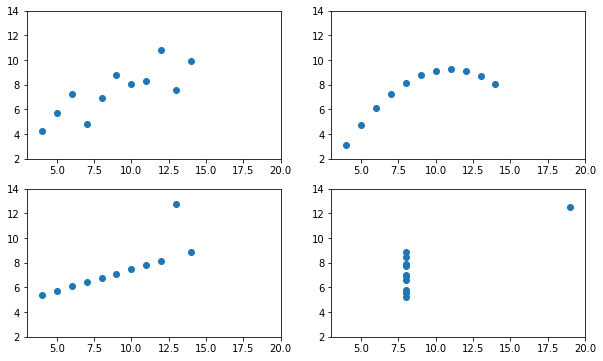

In [235]:
# копипаста из 6-ого урока,чтобы не выглядело совсем нагло
# хотя бы прокомментирую код, в подтверждение что я тут поразбирался :)
fig, axes = plt.subplots(nrows=2, ncols=2) # 2 строки, 2 столбца
fig.set_size_inches(10, 6) # размер графиков

ax1, ax2, ax3, ax4 = axes.flatten() # 4 пары выборок, значит 4 графика

for i, ax in enumerate(axes.flatten()):
    x_key = f'x{i + 1}' # по сути это перечисление x1, x2, x3, x4
    y_key = f'y{i + 1}'
    
    ax.scatter(data.T[x_key], data.T[y_key]) # тут строим график по значению
                                             # x_key y_key для текущего 
                                             # шага цикла
    
    ax.set_xlim(3, 20) # здесб просто ограничение области видимости
    ax.set_ylim(2, 14)